In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:



# Load the iris dataset
df = pd.read_csv('../iris-uci/iris.data', header=None)

# Assign column names
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# Map class names to integers
class_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
df['class'] = df['class'].map(class_mapping)

# Display the first few rows of the dataframe
df.head()



,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
import numpy as np

# Quantize the dataset
def quantize_to_bits(df, bits):
    df_quantized = df.copy()
    for column in df.columns[:-1]:  # Exclude the 'class' column
        max_val = df[column].max()
        min_val = df[column].min()
        df_quantized[column] = ((df[column] - min_val) / (max_val - min_val) * (2**bits - 1)).round().astype(int)
    return df_quantized

df_quantized = quantize_to_bits(df, 11)
df_quantized.head()


,sepal_length,sepal_width,petal_length,petal_width,class
0,455,1279,139,85,0
1,341,853,139,85,0
2,227,1024,104,85,0
3,171,938,173,85,0
4,398,1365,139,85,0


In [9]:
# Export the preprocessed data to a new CSV file without header
df_quantized.to_csv('../iris-uci/iris.csv', index=False, header=False)



In [1]:
def scott_bin_width(data):
    """
    Calculate the optimal bin width using Scott's rule.
    
    Parameters:
    data (array-like): The input data for which to calculate the bin width.
    
    Returns:
    float: The optimal bin width.
    """
    n = len(data)
    sigma = np.std(data)
    bin_width = 3.5 * sigma / n**(1/3)
    return bin_width

In [3]:

# Load the iris dataset
df = pd.read_csv('../iris-uci/iris.data', header=None)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# Quantize each feature using Scott's rule
quantized_data = df.copy()
for column in df.columns[:-1]:  # Exclude the 'class' column
    bin_width = scott_bin_width(df[column])
    num_bins = int((df[column].max() - df[column].min()) / bin_width)
    quantized_data[column] = np.floor((df[column] - df[column].min()) / bin_width).astype(int)

In [5]:
def display_caracteristics(df_encoded, df):
    # Afficher les caractéristiques du dataset
    num_features = df_encoded.shape[1]
    num_instances = df_encoded.shape[0]
    num_classes = df['income'].nunique()

    print(f"Nombre de features: {num_features}")
    print(f"Nombre d'instances: {num_instances}")
    print(f"Nombre de classes: {num_classes}")



In [6]:
# Appeler la fonction avec les DataFrames appropriés
display_caracteristics(quantized_data, df)

KeyError: 'income'

   sepal_length  sepal_width  petal_length  petal_width        class
0             1            5             0            0  Iris-setosa
1             1            3             0            0  Iris-setosa
2             0            4             0            0  Iris-setosa
3             0            3             0            0  Iris-setosa
4             1            5             0            0  Iris-setosa


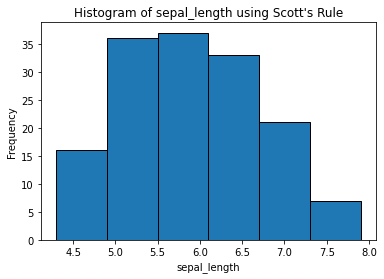

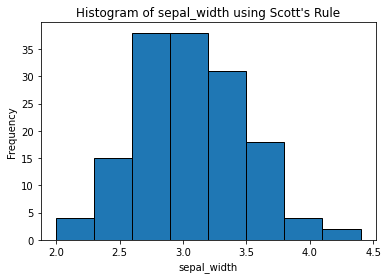

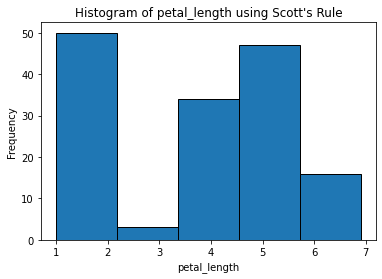

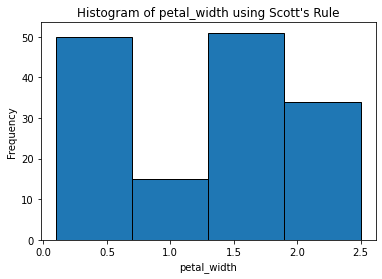

In [4]:
# Display the quantized data
print(quantized_data.head())

# Optionally, plot histograms for each feature
for column in df.columns[:-1]:
    plt.figure()
    plt.hist(df[column], bins=int((df[column].max() - df[column].min()) / scott_bin_width(df[column])), edgecolor='black')
    plt.title(f"Histogram of {column} using Scott's Rule")
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()